# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np #Always usefull and to be used


import keras
import tensorflow.random as tf_r
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers
import keras_tuner



import matplotlib as mpl
import matplotlib.pyplot as plt

from useful import *


# default font
plt.rcParams['font.size'] = 13

%run useful.py

# training data
perc_train = 0.8

## Read data

(2000, 8)
8
[1.83918812 2.04560279 5.67725029 5.95544703 9.6451452  6.53177097
 7.48906638 6.53569871] 1
[7.47714809 9.61306736 0.08388298 1.06444377 2.98703714 6.56411183
 8.09812553 8.72175914] 0
[9.64647597 7.23685347 6.42475328 7.17453621 4.67599007 3.25584678
 4.39644606 7.29689083] 0
[9.94014586 6.76873712 7.90822518 1.70914258 0.26849276 8.00370244
 9.03722538 0.2467621 ] 0
[4.91747318 5.26255167 5.9636601  0.51957545 8.95089528 7.2826618
 8.18350011 5.00222753] 1
data: 2000
train: 1600


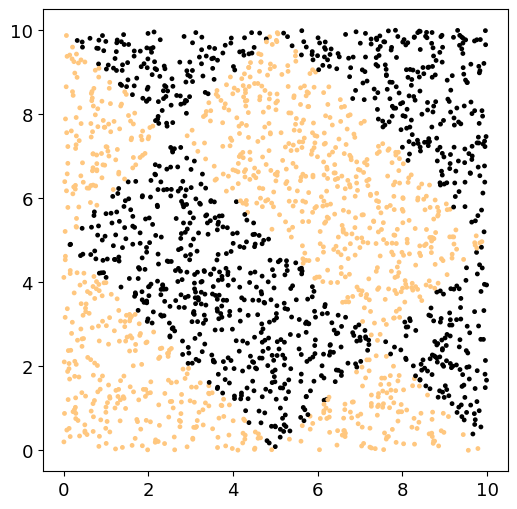

In [2]:
# Keras works with numpy arrays: just use them from the start
TYPE = 3

# data point size
L = 8
# span of each component
B = 10
x = np.loadtxt(filename("data",L,TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",L,TYPE), delimiter=' ')
y = y.astype("int")
print(x.shape)
N = len(x)
# average and std.dev.
x_mean = np.mean(x,axis=0)
x_std  = np.std(x,axis=0)


# dim. of a sample
L = len(x[0])
print(L)

for i in range(5):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plot_data(x,y)

## Standardize data

In [3]:
print("Before rescaling:\nMean value =", x_mean,"\nStd dev = ", x_std)
def Standardize(x, m, s):
    """
    rescale each component using its mean and standard deviation
    """
    N = len(x)
    # assuming len(m)=len(s)=len(x[0])
    mm, ss = np.tile(m,(N,1)), np.tile(s,(N,1))
    return (x - mm) / ss
x = Standardize(x, x_mean,x_std)
print("After rescaling:\nMean value =", x.mean(axis=0), "\nStd dev =", x.std(axis=0))

Before rescaling:
Mean value = [5.01860571 5.01726228 5.02153857 5.08947968 5.10248206 5.03670082
 4.88645281 5.05411547] 
Std dev =  [2.86912607 2.89535235 2.87312372 2.86324409 2.90278676 2.91948328
 2.92549254 2.89281292]
After rescaling:
Mean value = [ 2.53633226e-15  9.27924404e-16 -1.44884105e-15 -2.38371996e-15
 -2.85274582e-15 -2.02196593e-15 -1.09010023e-15 -1.53632662e-15] 
Std dev = [1. 1. 1. 1. 1. 1. 1. 1.]


## Split training and test data

In [4]:
(x_train, y_train) = (x[0 : N_train], y[0 : N_train])
(x_valid, y_valid) = (x[N_train : ], y[N_train : ])
print("Train: ", len(x_train), "\t Validation: ", len(x_valid))

Train:  1600 	 Validation:  400


## Define the model with Keras / Tensorflow

In [5]:
# reproducibility (?)
np.random.seed(12345)
tf_r.set_seed(12345)

# We use case 1
CASE = 1

if CASE == 1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid')) #sigmoid because we want a result between 0 and 1
    nepoch = 500
# as case 1 but one layer shorter
if CASE == 2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(40,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    nepoch = 400
#deeper
if CASE == 3:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch = 400
    
print(model.summary())

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113 (4.35 KB)

 Trainable params: 1,113 (4.35 KB)

 Non-trainable params: 0 (0.00 B)

None


## Optimization method and cost function

In [6]:
model.compile(loss='binary_crossentropy', optimizer='RMSprop', #optimizer='adam',
              metrics=['accuracy'])

## Training

In [7]:
fit = model.fit(x_train, y_train, epochs = nepoch, batch_size = 50, validation_data = (x_valid,y_valid), verbose=0)

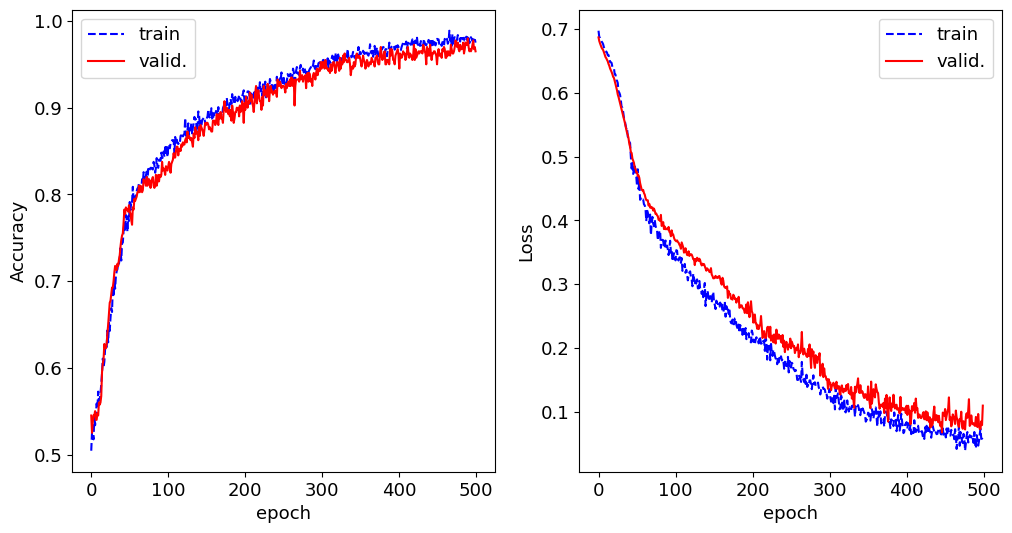

In [8]:
fig, AX = plt.subplots(1, 2, figsize = (12,6))

ax = AX[0]
ax.plot(fit.history['accuracy'], label="train", c="b", ls="--")
ax.plot(fit.history['val_accuracy'], label="valid.", c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()

ax = AX[1]
ax.plot(fit.history['loss'],label="train",c="b",ls="--")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

## Grid to show preditions

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step


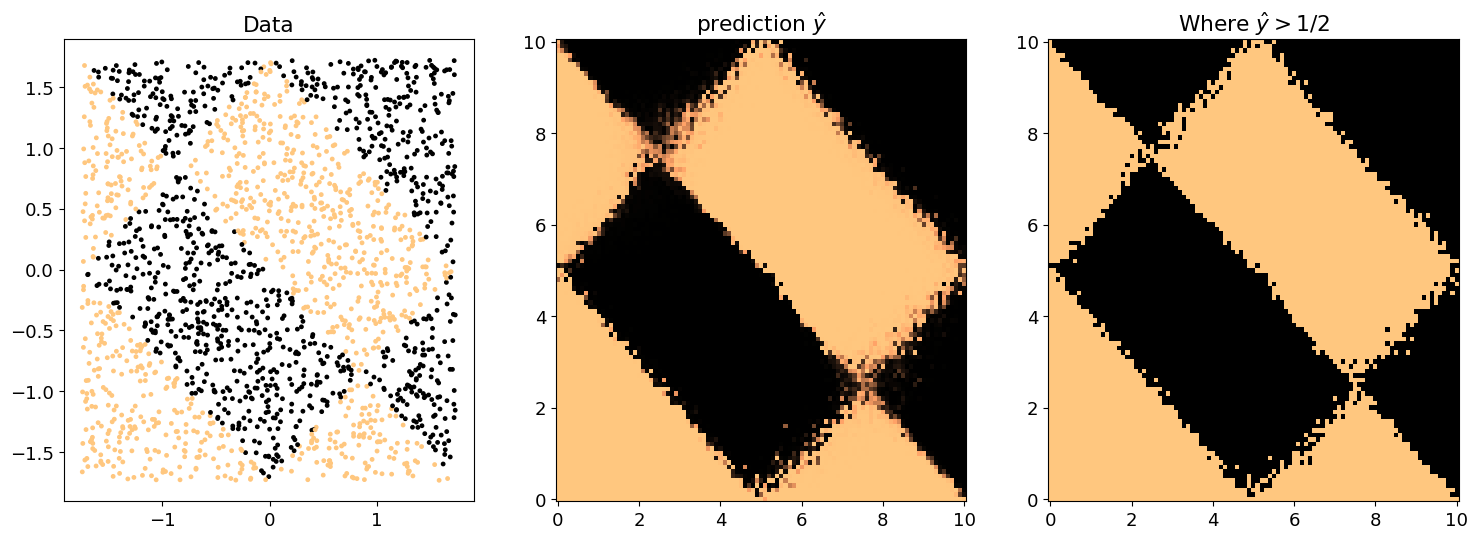

remember: these are 2 out of L=8 dimensions, of which L-2 contain random noise


In [9]:
dX = .1
X1 = np.arange(0,10+dX, dX)
LG = len(X1)
X, Y = np.meshgrid(X1, X1)
allXY = np.reshape((np.array((X,Y)).T),(LG**2,2))
grid = np.random.rand(LG**2,L)*B
grid[:,:2] = allXY
grid_r = Standardize(grid, x_mean, x_std)

pred = model.predict(grid_r)

fig, AX = plt.subplots(1, 3, figsize = (18,6.))

ax = AX[0]
ax.scatter(x[:,0],x[:,1], c=y, s=6)
ax.set_title("Data")


ax = AX[1]
ax.pcolormesh(X1,X1,pred.reshape((LG, LG)))
ax.set_title("prediction $\\hat y$")


ax = AX[2]
pred01=np.copy(pred)
pred01[pred>0.5]=1
pred01[pred<=0.5]=0

ax.pcolormesh(X1,X1,pred01.reshape((LG, LG)))
ax.set_title("Where $\\hat y > 1/2$")

plt.show()

print(f"remember: these are 2 out of L={L} dimensions, of which L-2 contain random noise")

# Random Search

We implement a random search using **keras_tuner** in order to find the best hyperparameters of the model into an hyperparameters space composed by the following:
- Layers of the model: from 1 to 6
- Neurons of the model: from 10 to 30 with steps of 5 
- Activation functions: ReLU, sigmoid, tanh, elu
- Optimizers: ADAM, RMSprop, SGD
- Dropout values: 0, 0.1, 0.2
- Learning rates: from 10e-6 to 10e-1

In [ ]:
#We start by building the model

def build_model(hp):
    

    model = keras.Sequential()
    model.add(layers.Flatten())
    # Tune the number of layers of the model
    for i in range(hp.Int("num_layers", 1, 6)):
        model.add(layers.Dense(
                #Define the units and the activation functions
                units=hp.Int(f"units_{i}", min_value=10, max_value=30, step=5),
                activation=hp.Choice("activation", ["relu", "sigmoid", "tanh", "elu"]),
            )
        )
        #Define the dropout values of the model 
        model.add(layers.Dropout(rate=hp.Float("dropout", min_value = 0, max_value = 0.2, step = 0.05)))
        
    #Output layer is composed by 1 neuron since it's classification task
    model.add(layers.Dense(1, activation="sigmoid"))

    #Define the learning rate of the model 
    learning_rate = hp.Float("lr", min_value=1e-6, max_value=1e-1, sampling="log")
    model.compile(

        #Define the optimizers of the model
        optimizer=hp.Choice("optimizer", ["adam", "RMSprop", "SGD"]), loss="binary_crossentropy",
        metrics=["accuracy"])
    return model


build_model(keras_tuner.HyperParameters())

#After builiding the model we impose the tuning 
tuner = keras_tuner.RandomSearch(
    hypermodel = build_model,
    objective = "val_accuracy",
    max_trials = 10,
    executions_per_trial = 1,
    overwrite = True,
)

tuner.search_space_summary()

#We search for "max_trials" the best hyperparameters of out model
tuner.search(x_train, y_train, batch_size = 50, epochs = 320, validation_data=(x_valid,y_valid), verbose=1)

Trial 10 Complete [00h 00m 14s]
val_accuracy: 0.9574999809265137

Best val_accuracy So Far: 0.9574999809265137
Total elapsed time: 00h 01m 57s


In [18]:
#A way to visualize the NN
models = tuner.get_best_models(num_models=2)
#keras.utils.plot_model(model[0], show_shapes=True)

models[1].summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (50, 8)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (50, 30)               │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (50, 30)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (50, 1)                │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 06 summary
Hyperparameters:
num_layers: 2
units_0: 10
activation: relu
dropout: 0.05
lr: 0.07729905575142265
optimizer: adam
units_1: 25
units_2: 15
units_3: 20
units_4: 25
units_5: 15
Score: 0.9649999737739563

Trial 11 summary
Hyperparameters:
num_layers: 5
units_0: 20
activation: elu
dropout: 0.15000000000000002
lr: 0.02266749528908568
optimizer: RMSprop
units_1: 30
units_2: 15
units_3: 10
units_4: 20
units_5: 30
Score: 0.9624999761581421

Trial 03 summary
Hyperparameters:
num_layers: 6
units_0: 25
activation: relu
dropout: 0.05
lr: 0.012906221447325242
optimizer: RMSprop
units_1: 25
units_2: 10
units_3: 20
units_4: 20
units_5: 10
Score: 0.9325000047683716

Trial 00 summary
Hyperparameters:
num_layers: 5
units_0: 30
activation: relu
dropout: 0.15000000000000002
lr: 0.008421444638626397
optimizer: RMSprop
units_1: 10
units_2: 10
units_3: 10
units_4: 10
Score: 0.

# Augmentation

In [13]:
max_array = [ max( x_train[:,i] ) for i in range(L) ]
min_array = [ min( x_train[:,i] ) for i in range(L) ]
center_point = []
N = 10000

for j in range(N):
    a = []
    a = [ np.random.uniform( min_array[i], max_array[i] ) for i in range(L)  ]
    center_point.append(a)
center_point = np.array(center_point)
epsilon = 2
thresold = 0.6

x_augum = []
y_augum = []

for i in range(N):
    mask =  np.sqrt( np.sum ( ( x_train - center_point[i,:] ) ** 2, axis = 1)    ) < epsilon
    inside_sphere = y_train[mask]
    if np.mean(inside_sphere) >= thresold or np.mean(inside_sphere) <= (1-thresold):
        
        x_augum.append( center_point[i,:] )
        y_augum.append( round(np.mean(inside_sphere) ) )

x_augum = np.array(x_augum)

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
